continuing ODE with the earth orbiting around the sun

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def f(r,t): #where r is the vector (x,y)
    x=r[0]
    y=r[1]
    R=(x**2+y**2)**0.5
    return np.array([-G*M*x/(R**3),-G*M*y/(R**3)],float)

In [7]:
G=6.6738e-11
M=1.9891e30
x0=-1.471e11
y0=0
vx0=0
vy0=3.0287e4 
h=60*60*24 #1hr in seconds
YR=3.154e7 #approximate seconds in a year
Ts=np.arange(0,3*YR,h)

In [9]:
#create separate arrays for Rs and Vs
Rs=np.zeros((Ts.size,2))
Vs=np.zeros((Ts.size,2))
Rs[0,0]=x0
Rs[0,1]=y0
Vs[0,0]=vx0
Vs[0,1]=vy0

In [11]:
#now do a single Euler step
#do half a step for the Vs and overwrite the initial velocities
#so for V the indices stand in for 0.5, 1.5, 2.5, etc
Vs[0]=Vs[0]+h/2*f(Rs[0],Ts[0]) #so for V the indices stand in for 0, 0.5, 1.5, etc

In [17]:
Vs[0]

array([  265.02583187, 30287.        ])

In [21]:
Rs[0]

array([-1.471e+11,  0.000e+00])

In [19]:
for i in range(1, len(Ts)): #start at second point
    t=Ts[i-1]
    rt=Rs[i-1]
    vthalf=Vs[i-1]
    Rs[i]=rt+h*vthalf
    k=h*f(Rs[i],t+h) #remember that Rs[i] is r(t+h)
    Vs[i]=vthalf+k
    print(Rs[i],Vs[i])

[-1.47077102e+11  2.61679680e+09] [  794.99088953 30277.57085807]
[-1.47008415e+11  5.23277892e+09] [ 1324.69616519 30258.71594688]
[-1.46893961e+11  7.84713198e+09] [ 1853.96859148 30230.44200995]
[-1.46733778e+11  1.04590422e+10] [ 2382.63528197 30192.75915814]
[-1.46527918e+11  1.30676966e+10] [ 2910.52360327 30145.68086423]
[-1.46276449e+11  1.56722834e+10] [ 3437.46124708 30089.22395583]
[-1.45979452e+11  1.82719923e+10] [ 3963.27630193 30023.40860648]
[-1.45637025e+11  2.08660148e+10] [ 4487.79732466 29948.25832499]
[-1.45249280e+11  2.34535444e+10] [ 5010.85341159 29863.79994301]
[-1.44816342e+11  2.60337767e+10] [ 5532.27426924 29770.0636009 ]
[-1.44338353e+11  2.86059102e+10] [ 6051.89028468 29667.08273188]
[-1.43815470e+11  3.11691461e+10] [ 6569.53259537 29554.89404442]
[-1.43247862e+11  3.37226890e+10] [ 7085.0331585  29433.53750298]
[-1.42635716e+11  3.62657466e+10] [ 7598.22481966 29303.05630707]
[-1.41979229e+11  3.87975307e+10] [ 8108.94138098 29163.49686869]
[-1.412786

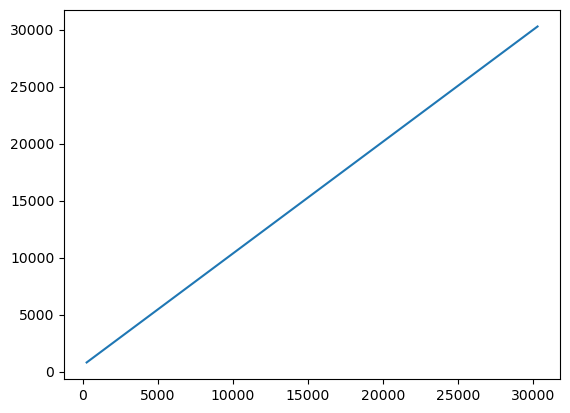

In [23]:
plt.plot(Vs[0],Vs[1])

Partial Differential Equations:
- very important in physics
- often boundary value problems instead of initial value problems
- will quickly run into issues with having too many points because it is multidimensional
- take continuous math formula and think about how to discretize, and then think about how to solve it
- ex: consider Laplace's equation for electric potential in 2D with relaxation method
    - start with initial guesses for the internal points
    - then use the equation (on slides) to generate new values for the internal points and repeat
    - called the Jacobi method
    - this doesn't always converge though

In [39]:
M=100 #grid squares on a side
V=1.0 #voltage at top wall
tol=1e-6 #target accuracy

#array for potential values
phi=np.zeros([M+1,M+1],float)
phi[0,:]=V #top row is all set to the boundary condition
phiprime=np.empty([M+1,M+1],float) #prime as in the next step in the relaxation, not the derivative

delta=1.0
while delta>tol:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M: #handling edge points differently
                phiprime[i,j]=phi[i,j]
            else:
                phiprime[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4 
    #calculate the maximum difference from old values
    delta=np.max(abs(phi-phiprime))
    #update phi to phiprime by swapping the two arrays around
    #instead of making a new empty phiprime array because that will take more RAM
    #and we are just going to overwrite the phiprime array anyways
    phi,phiprime=phiprime,phi

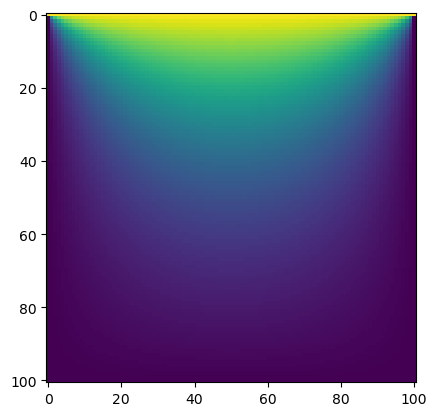

In [40]:
plt.imshow(phi)

Shortcomings of this method:
- only determine the values on the gridpoints so would need interpolation to get the values at other points
- much trickier if the boundaries are not square or rectangular
- ex: poisson's equation with charges on the grid now

In [58]:
M=100 #grid squares on a side
V=1.0 #voltage at top wall
tol=1e-6 #target accuracy
ep0=1

#array for potential values
phi=np.zeros([M+1,M+1],float)
phi[0,:]=V #top row is all set to the boundary condition
phiprime=np.empty([M+1,M+1],float) #prime as in the next step in the relaxation, not the derivative

In [60]:
def rho(x,y):
    if x>60 and x<80 and y>20 and y<40:
        return 1
    elif x>20 and x<40 and y>60 and y<80:
        return -1
    else:
        return 0

In [62]:
rho=np.zeros([M+1,M+1],float)
rho[60:80,20:40]=1
rho[20:40,60:80]=-1

In [64]:
delta=1.0
while delta>tol:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M: #handling edge points differently
                phiprime[i,j]=phi[i,j]
            else:
                phiprime[i,j]=(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4 + rho[i,j]/(4*ep0)
    #calculate the maximum difference from old values
    delta=np.max(abs(phi-phiprime))
    #update phi to phiprime by swapping the two arrays around
    #instead of making a new empty phiprime array because that will take more RAM
    #and we are just going to overwrite the phiprime array anyways
    phi,phiprime=phiprime,phi

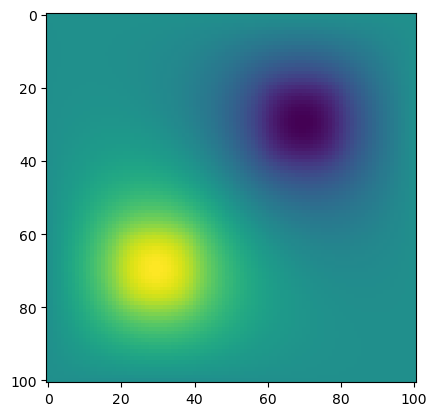

In [65]:
plt.imshow(phi)

More efficient methods:
- overrelaxation
    - try to overshoot each step to make it happen faster
    - each step, add a multiplier to the modification
    - the choice of multiplier is very important. if it's too big, will jump past the answer and end up bouncing back and forth.
    - can't do more than double the modification
    - this is unstable though
- Gauss-Seidel method
    - update the new values phiprime instead of phi when possible
    - this also allows us to use just one array of values that is overwritten as we go through the array
    - this combined with overrelaxation is stable